In [531]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [532]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In this exercise, you will work with the “Blues Guitarists Hand Posture and Thumbing Style by Region and Birth Period” data. This dataset has 93 entries of various blues guitarists born between 1874 and 1940. Apart from the name of the guitarists, that dataset contains the following four features:

***Dataset columns descriptions***

| Regions| Description | 
| --- | --- | 
|  1 | East | 
|  2 | Delta | 
|  3 | Texas | 



|Years | Description|
| --- | --- |
| 0  | For those born before 1906 |
| 1 | For the rest |


|Hand postures| Description|
| --- | --- |
| 1| Extended |
| 2 | Stacked |
| 3 | Lutiform |


|Thumb styles: Between 1 and 3  | Description|
| --- | --- |
| 1 | Alternating |
| 2 | Utility |
| 3 | Dead |

In [533]:
df = pd.read_csv('~/UW/IMT_574/Week4/Homework/blues_hand.csv')
df.head()

,name,state,brthYr,post1906,region,handPost,thumbSty
0,Henry Thomas,TX,1874,0,3,1,3
1,Frank Stokes,TN,1887,0,2,1,3
2,Sam Collins,MS,1887,0,2,1,2
3,Peg Leg Howell,GA,1888,0,1,2,2
4,Huddie Ledbetter,TX,1888,0,3,2,3


In [534]:
guitarrist_data_for_model = df.copy()

In [535]:
#Renaming columns
guitarrist_data_for_model.rename(columns={'name':'Name', 'state':'State', 'brthYr':"Birth_Year", 'post1906':'Post_1906'
                                          ,'region':'Region', 'handPost': 'Hand_Posture', 'thumbSty':'Thumb_Styles' },  inplace=True)

#Adding constant
guitarrist_data_for_model['constant'] = 1

guitarrist_data_for_model.head()

,Name,State,Birth_Year,Post_1906,Region,Hand_Posture,Thumb_Styles,constant
0,Henry Thomas,TX,1874,0,3,1,3,1
1,Frank Stokes,TN,1887,0,2,1,3,1
2,Sam Collins,MS,1887,0,2,1,2,1
3,Peg Leg Howell,GA,1888,0,1,2,2,1
4,Huddie Ledbetter,TX,1888,0,3,2,3,1


In [536]:
#Checking for missing values to impute
guitarrist_data_for_model.isna().any()

Name            False
State           False
Birth_Year      False
Post_1906       False
Region          False
Hand_Posture    False
Thumb_Styles    False
constant        False
dtype: bool

In [537]:
guitarrist_data_for_model.dtypes

Name            object
State           object
Birth_Year       int64
Post_1906        int64
Region           int64
Hand_Posture     int64
Thumb_Styles     int64
constant         int64
dtype: object

***Step 1***

Using decision tree on this dataset, how accurately you can tell their birth year from their hand postures and thumb styles. How does it affect the evaluation when you include the region while training the model?

In [538]:
#Splitting training(70%) and testing data (30%)

X = guitarrist_data_for_model[['Hand_Posture', 'Thumb_Styles', 'constant']].copy()
y = guitarrist_data_for_model.Birth_Year.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=20)

In [539]:
regression_model = tree.DecisionTreeRegressor(max_depth=2)

In [540]:
regression_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 2.5\nsquared_error = 136.091\nsamples = 63\nvalue = 1908.063'),
 Text(0.25, 0.5, 'x[1] <= 2.5\nsquared_error = 132.715\nsamples = 55\nvalue = 1907.109'),
 Text(0.125, 0.16666666666666666, 'squared_error = 151.228\nsamples = 39\nvalue = 1908.718'),
 Text(0.375, 0.16666666666666666, 'squared_error = 65.902\nsamples = 16\nvalue = 1903.188'),
 Text(0.75, 0.5, 'x[1] <= 1.5\nsquared_error = 109.984\nsamples = 8\nvalue = 1914.625'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1924.0'),
 Text(0.875, 0.16666666666666666, 'squared_error = 111.347\nsamples = 7\nvalue = 1913.286')]

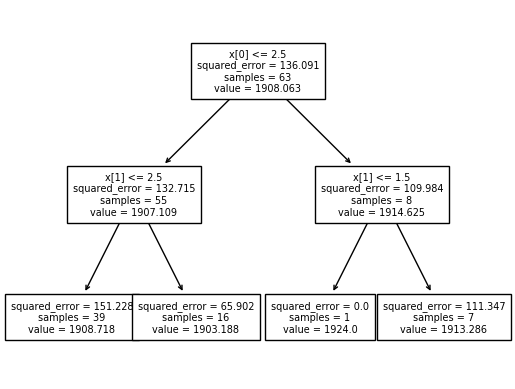

In [541]:
tree.plot_tree(regression_model, fontsize=7)


In [542]:
predictions = regression_model.predict(X_train)
predictions

array([1913.28571429, 1908.71794872, 1908.71794872, 1903.1875    ,
       1903.1875    , 1908.71794872, 1908.71794872, 1903.1875    ,
       1903.1875    , 1908.71794872, 1913.28571429, 1908.71794872,
       1908.71794872, 1908.71794872, 1903.1875    , 1908.71794872,
       1903.1875    , 1903.1875    , 1908.71794872, 1913.28571429,
       1908.71794872, 1908.71794872, 1908.71794872, 1903.1875    ,
       1903.1875    , 1908.71794872, 1908.71794872, 1924.        ,
       1908.71794872, 1908.71794872, 1908.71794872, 1908.71794872,
       1908.71794872, 1908.71794872, 1908.71794872, 1913.28571429,
       1903.1875    , 1913.28571429, 1908.71794872, 1908.71794872,
       1903.1875    , 1903.1875    , 1908.71794872, 1913.28571429,
       1908.71794872, 1908.71794872, 1908.71794872, 1908.71794872,
       1908.71794872, 1908.71794872, 1908.71794872, 1903.1875    ,
       1903.1875    , 1908.71794872, 1908.71794872, 1908.71794872,
       1903.1875    , 1908.71794872, 1908.71794872, 1903.1875 

In [543]:
scores = cross_val_score(regression_model, X_train, y_train, cv = 5)
scores

array([ 0.12700907,  0.05656837, -0.13507159, -0.25092202, -0.35775622])

In [544]:
print(r2_score(y_test, regression_model.predict(X_test)))

-0.0003048139569963304


In [545]:
#Adding Region
X_2 = guitarrist_data_for_model[['Hand_Posture', 'Thumb_Styles', 'Region', 'constant']].copy()
y_2 = guitarrist_data_for_model.Birth_Year.copy()

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=30, random_state=20)


In [546]:
regression_model_2 = tree.DecisionTreeRegressor(max_depth=2)

In [547]:
regression_model_2.fit(X_train_2, y_train_2)


DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 2.5\nsquared_error = 136.091\nsamples = 63\nvalue = 1908.063'),
 Text(0.25, 0.5, 'x[2] <= 1.5\nsquared_error = 132.715\nsamples = 55\nvalue = 1907.109'),
 Text(0.125, 0.16666666666666666, 'squared_error = 164.134\nsamples = 25\nvalue = 1910.16'),
 Text(0.375, 0.16666666666666666, 'squared_error = 92.312\nsamples = 30\nvalue = 1904.567'),
 Text(0.75, 0.5, 'x[2] <= 2.5\nsquared_error = 109.984\nsamples = 8\nvalue = 1914.625'),
 Text(0.625, 0.16666666666666666, 'squared_error = 76.408\nsamples = 7\nvalue = 1912.143'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1932.0')]

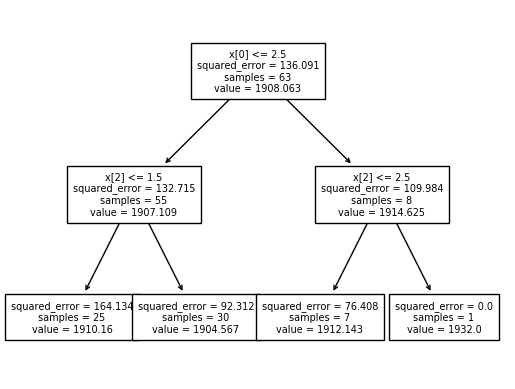

In [548]:
tree.plot_tree(regression_model_2, fontsize=7)

In [549]:
predictions_2 = regression_model_2.predict(X_train_2)


In [550]:
scores_2 = cross_val_score(regression_model_2, X_train_2, y_train_2, cv = 5)
scores_2

array([ 0.18490795, -0.05957911, -0.34544713, -0.23259902, -0.34049103])

In [551]:

print(r2_score(y_test_2, regression_model_2.predict(X_test_2)))

-0.13406776871892534


---

***Step 2***

Now do the same using random forest (in both of the above cases) and report the difference. Make sure to use appropriate training-testing parameters for your evaluation.

In [552]:
regression_model_rf = RandomForestRegressor(n_estimators=100, max_depth=5)

In [553]:
regression_model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [554]:
predictions_rf = regression_model_rf.predict(X_test)
predictions_rf

array([1908.55664363, 1908.55664363, 1910.51897097, 1914.41524639,
       1908.55664363, 1908.55664363, 1914.41524639, 1904.23519657,
       1902.4967298 , 1904.23519657, 1910.20692857, 1910.51897097,
       1902.4967298 , 1904.23519657, 1910.51897097, 1911.77191928,
       1904.23519657, 1908.55664363, 1908.55664363, 1911.77191928,
       1910.51897097, 1904.23519657, 1900.09608651, 1914.41524639,
       1904.23519657, 1902.4967298 , 1902.4967298 , 1911.77191928,
       1904.23519657, 1910.51897097])

In [555]:
scores_rf = cross_val_score(regression_model_rf, X_train, y_train, cv = 5)
scores_rf

array([ 0.20921287,  0.0984151 , -0.07644584, -0.29286775, -0.36212774])

In [556]:
print(r2_score(y_test, regression_model_rf.predict(X_test)))

0.030893585663360312


You should also run the algorithms multiple times, measure various accuracies, and report the average (and perhaps the range).